# Title

In [6]:
import pandas as pd
import seaborn as sns
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import os
os.chdir("..")

In [7]:
df = pd.read_stata("116320-V2\\ADH-WWD-AERi-Data-Corrected\\Public Release Data\\dta\\workfile9014wwd.dta")
cols = ["czone", "statefip","yr", "t2", "timepwt24", "d_impusch_p9", "d_impuschm_p9cen", "d_impuschf_p9cen", "d_impotch_p9_lag", ]
filtered_elements = [element for element in df.columns if "reg" in element]
cols+= filtered_elements
true_df = df[cols]
true_df

,czone,statefip,yr,t2,timepwt24,d_impusch_p9,d_impuschm_p9cen,d_impuschf_p9cen,d_impotch_p9_lag,reg_midatl,reg_encen,reg_wncen,reg_satl,reg_escen,reg_wscen,reg_mount,reg_pacif
0,100.0,47,1990.0,0.0,0.002114,1.368996,0.853212,0.515783,1.214706,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,100.0,47,2000.0,1.0,0.002894,2.170298,1.234350,0.935948,2.525805,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,200.0,47,1990.0,0.0,0.000732,2.093069,1.274826,0.818244,1.506115,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,200.0,47,2000.0,1.0,0.001142,2.604384,1.606744,0.997641,3.109452,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,301.0,47,1990.0,0.0,0.000261,1.977159,1.226143,0.751015,0.813720,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1439,39302.0,53,2000.0,1.0,0.000846,0.501683,0.298361,0.203321,0.539953,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1440,39303.0,53,1990.0,0.0,0.000309,0.203265,0.137203,0.066062,0.141234,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1441,39303.0,53,2000.0,1.0,0.000459,0.217105,0.146042,0.071063,0.219764,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1442,39400.0,53,1990.0,0.0,0.012741,0.907547,0.533567,0.373981,0.378374,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [8]:
df_2 = pd.read_stata("116320-V2\\ADH-WWD-AERi-Data-Corrected\\Public Release Data\\dta\\workfile_china.dta")

cols_2 = ["czone","d_avg_lnwkwage", "d_avg_lnwkwage_m", "d_avg_lnwkwage_f"]
cols_2 +=["l_shind_manuf_cbp", "l_sh_popedu_c", "l_sh_popfborn", "l_sh_empl_f", "l_sh_routine33", "l_task_outsource"]
meging_on = df_2[cols_2]
true_df = true_df.merge(right=meging_on, left_on=true_df.index, right_on=meging_on.index)
true_df.drop("key_0",axis=1,inplace=True)
true_df.to_stata("data2019.dta")
""" mapping = {
    "czone_x": "czone",
    "t2": "After",
    "timepwt24": "CZ weight by period Length", 
    "d_impusch_p9": "CZ China Import Exposure",
    "d_impuschm_p9cen": "CZ China Import Exposure Male",
    "d_impuschf_p9cen": "CZ China Import Exposure Female",
    "d_impotch_p9_lag": "Instrument Other Developed Countries imports China",
    "d_avg_lnwkwage": "Log Weekly Avg Wage",
    "d_avg_lnwkwage_m": "Log Weekly Avg Wage Male",
    "d_avg_lnwkwage_f": "Log Weekly Avg Wage Female",
}
true_df.rename(mapper=mapping, axis=1,inplace=True) """
true_df

,czone_x,statefip,yr,t2,timepwt24,d_impusch_p9,d_impuschm_p9cen,d_impuschf_p9cen,d_impotch_p9_lag,reg_midatl,...,czone_y,d_avg_lnwkwage,d_avg_lnwkwage_m,d_avg_lnwkwage_f,l_shind_manuf_cbp,l_sh_popedu_c,l_sh_popfborn,l_sh_empl_f,l_sh_routine33,l_task_outsource
0,100.0,47,1990.0,0.0,0.002114,1.368996,0.853212,0.515783,1.214706,0.0,...,100.0,11.314535,8.091927,16.929960,39.787476,33.884003,1.065476,57.659035,31.322742,-0.174807
1,100.0,47,2000.0,1.0,0.002894,2.170298,1.234350,0.935948,2.525805,0.0,...,100.0,1.880373,0.321320,5.592074,29.703432,42.118324,1.789442,60.514069,31.796432,-0.668905
2,200.0,47,1990.0,0.0,0.000732,2.093069,1.274826,0.818244,1.506115,0.0,...,200.0,6.335258,0.958824,14.564991,42.233002,31.591215,0.965240,57.389729,29.615757,-0.132126
3,200.0,47,2000.0,1.0,0.001142,2.604384,1.606744,0.997641,3.109452,0.0,...,200.0,0.935486,-1.682622,5.594458,30.815619,34.165863,3.485157,59.977715,31.869707,-0.382597
4,301.0,47,1990.0,0.0,0.000261,1.977159,1.226143,0.751015,0.813720,0.0,...,301.0,4.452181,1.653051,10.382938,33.025658,26.137537,0.752831,46.720547,28.812309,-0.427937
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1439,39302.0,53,2000.0,1.0,0.000846,0.501683,0.298361,0.203321,0.539953,0.0,...,39302.0,-2.977235,-3.285613,-2.540452,15.105149,63.824886,12.261012,66.534142,29.666033,-0.133045
1440,39303.0,53,1990.0,0.0,0.000309,0.203265,0.137203,0.066062,0.141234,0.0,...,39303.0,10.134029,4.436827,20.702648,21.871569,47.785984,4.538155,56.382107,26.858339,-0.496753
1441,39303.0,53,2000.0,1.0,0.000459,0.217105,0.146042,0.071063,0.219764,0.0,...,39303.0,-5.384173,-8.482320,0.495093,13.631065,57.584846,6.137667,60.407291,28.428104,-0.890851
1442,39400.0,53,1990.0,0.0,0.012741,0.907547,0.533567,0.373981,0.378374,0.0,...,39400.0,15.652132,13.225651,20.508671,20.711973,60.187061,9.662724,67.012947,32.512493,0.238079


In [9]:
t2_0 = true_df[true_df["t2"]==0.0]
t2_1 = true_df[true_df["t2"]==1.0]
t2_0_state = t2_0.groupby("statefip").mean()
t2_1_state = t2_1.groupby("statefip").mean()
state = pd.concat([t2_0_state,t2_1_state])
state.reset_index(inplace=True)
state.sort_values("statefip",ascending=True,inplace=True)
state.reset_index(inplace=True,drop=True)
state.drop(["czone_x","czone_y"],axis=1,inplace=True)
state

,statefip,yr,t2,timepwt24,d_impusch_p9,d_impuschm_p9cen,d_impuschf_p9cen,d_impotch_p9_lag,reg_midatl,reg_encen,...,reg_pacif,d_avg_lnwkwage,d_avg_lnwkwage_m,d_avg_lnwkwage_f,l_shind_manuf_cbp,l_sh_popedu_c,l_sh_popfborn,l_sh_empl_f,l_sh_routine33,l_task_outsource
0,1,1990.0,0.0,0.001105,0.984300,0.534563,0.449737,1.721744,0.0,0.0,...,0.0,14.215848,11.863596,18.901043,35.326488,38.039005,1.620719,56.670403,29.103809,-0.103228
1,1,2000.0,1.0,0.001512,2.017656,0.921003,1.096652,1.886410,0.0,0.0,...,0.0,1.612780,-0.210913,5.152303,26.547970,44.098412,2.911856,57.014446,29.520506,-0.562719
2,4,2000.0,1.0,0.004884,0.511074,0.322365,0.188709,0.676030,0.0,0.0,...,0.0,6.079251,4.305512,9.458269,8.309870,52.944374,13.747243,57.038990,29.960369,-0.493531
3,4,1990.0,0.0,0.002845,0.384219,0.233035,0.151185,0.279394,0.0,0.0,...,0.0,10.306749,8.131170,14.925699,10.642498,48.208500,9.823069,53.930153,30.311438,-0.335457
4,5,2000.0,1.0,0.000792,1.706040,0.957425,0.748616,1.804942,0.0,0.0,...,0.0,2.706717,1.568094,5.258046,30.512695,39.691521,2.996666,59.518047,28.891653,-0.851361
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,54,1990.0,0.0,0.000577,0.406652,0.268942,0.137710,0.564460,0.0,0.0,...,0.0,7.513180,4.699297,13.814659,16.334679,31.260254,1.071721,47.429420,26.188730,-0.942617
92,55,2000.0,1.0,0.001746,1.260977,0.772376,0.488600,1.270714,0.0,1.0,...,0.0,2.559153,-0.310762,7.319636,26.657816,51.130596,3.160956,74.443672,31.420828,-0.243039
93,55,1990.0,0.0,0.001291,1.026026,0.545942,0.480084,0.617923,0.0,1.0,...,0.0,17.041925,13.292866,24.558725,28.925844,42.002731,1.972870,68.845955,29.958689,-0.248631
94,56,1990.0,0.0,0.000151,0.186295,0.054997,0.131298,0.111378,0.0,0.0,...,0.0,6.791133,6.427894,10.154075,7.432178,50.491638,2.667684,63.687191,24.865427,-0.645410


In [10]:
shapefile  = gpd.read_file("cb_2018_us_state_5m.shp")
shapefile

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry
0,31,01779792,0400000US31,31,NE,Nebraska,00,198956658395,1371829134,"POLYGON ((-104.05351 41.15726, -104.05267 41.2..."
1,53,01779804,0400000US53,53,WA,Washington,00,172112588220,12559278850,"MULTIPOLYGON (((-122.32834 48.02134, -122.3217..."
2,35,00897535,0400000US35,35,NM,New Mexico,00,314196306401,728776523,"POLYGON ((-109.05017 31.48, -109.04984 31.4995..."
3,46,01785534,0400000US46,46,SD,South Dakota,00,196346981786,3382720225,"POLYGON ((-104.0577 44.99743, -104.05021 44.99..."
4,48,01779801,0400000US48,48,TX,Texas,00,676653171537,19006305260,"POLYGON ((-106.64548 31.89867, -106.64084 31.9..."
5,06,01779778,0400000US06,06,CA,California,00,403503931312,20463871877,"MULTIPOLYGON (((-118.60338 33.4781, -118.59878..."
6,21,01779786,0400000US21,21,KY,Kentucky,00,102279490672,2375337755,"MULTIPOLYGON (((-89.40565 36.52816, -89.39868 ..."
7,39,01085497,0400000US39,39,OH,Ohio,00,105828882568,10268850702,"MULTIPOLYGON (((-82.73571 41.60336, -82.7188 4..."
8,01,01779775,0400000US01,01,AL,Alabama,00,131174048583,4593327154,"MULTIPOLYGON (((-88.04374 30.51742, -88.03661 ..."
9,13,01705317,0400000US13,13,GA,Georgia,00,149482048342,4422936154,"POLYGON ((-85.60516 34.98468, -85.55259 34.984..."


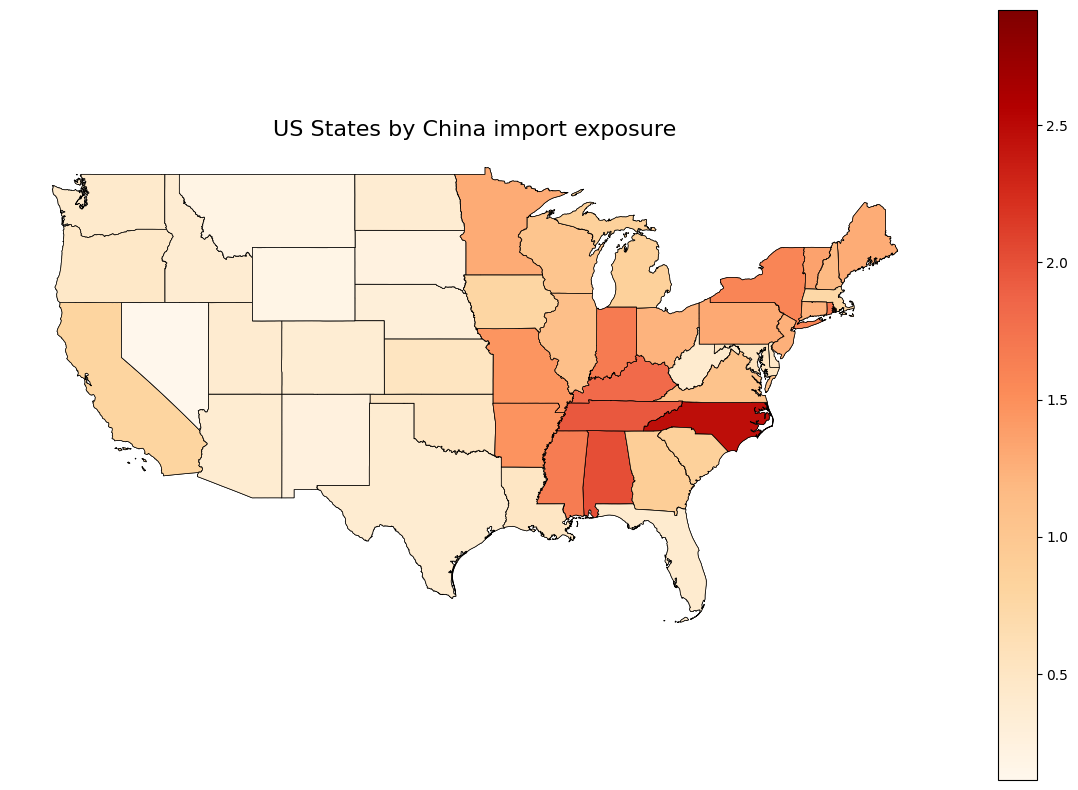

In [11]:

data = state
data['statefip'] = data['statefip'].astype(str).str.zfill(2)
# Step 3: Merge the shapefile with your data
# Adjust the column names as needed: here we assume the shapefile has a column 'CZ_ID'
merged = shapefile.merge(data, left_on='STATEFP', right_on='statefip')

# Step 4: Create the map
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
merged.plot(column='d_impusch_p9',  # Column to visualize
            ax=ax, 
            legend=True, 
            cmap='OrRd',                # Choose an appropriate color map
            edgecolor='black',          # Optional: adds borders for clarity
            linewidth=0.5)

ax.set_title("US States by China import exposure", fontsize=16)
ax.set_axis_off()  # Optional: Hide the axis for a cleaner map

plt.show()